# YoloV4 License Plate Recognition

Will be investigating the effectiveness of yolov4 model against frame selection.

## Applying Y4 to Post MobileNet Frames

In [61]:
'''
willl analyze the result from yolov4's license plate detection in comparison to the response data from
openAlpr API
'''
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import webbrowser
import os


def to_float(lp):
    try:
        return float(lp)
    except ValueError:
        return 0

def to_bool(num):
    return True if num == 1 else False

def to_link(string):
    '''
    given url string, return it in a tag
    '''
    fstring = '<a href={url}>img link</a>'.format(url=string)
    return fstring

#file = 'adjusted_video_box3.csv'
file = 'yolo_detect.csv'

df = pd.read_csv(file)
#print(df.columns)
df["ナンバープレート"] = df["ナンバープレート"].str.strip()
df = df[['local_img_path','物体画像', 'ナンバープレート','box_x_min', 'box_y_min', 'box_x_max', 'box_y_max', 'over_x_min', 'over_y_min', \
         'over_x_max', 'over_y_max', 'aoi_x_min', 'aoi_y_min', 'aoi_x_max', 'aoi_y_max', 'box_height', 'box_width', \
        'yolo_x_min', 'yolo_x_max', 'yolo_y_min', 'yolo_y_max','yolo_time', "img_url"]]
#df.drop_duplicates(subset=['img_url'], inplace=True, keep=False)

df['box_area'] = (df['box_x_max'] - df['box_x_min'])*(df['box_y_max'] - df['box_y_min'])
df['overlap_area'] = (df['over_x_max'] - df['over_x_min'])*(df['over_y_max'] - df['over_y_min'])
df['area_of_interest'] = (df['aoi_x_max'] - df['aoi_x_min'])*(df['aoi_y_max'] - df['aoi_y_min'])
df['box_height_over_width'] = df['box_height'] / df['box_width']
# checking this
#df['overlap_right_buttom'] = df[(df['box_x_min'] < df['aoi_x_min']) & (df['aoi_x_min'] < df['aoi_x_max'])]
df['frame_area'] = 1
df.loc[df["ナンバープレート"] != "None", 'plate_present'] = 1
df.loc[df["ナンバープレート"] == "None", 'plate_present'] = 0

df['yolo_detect'] = 1
df.loc[(df['yolo_x_min'] == 0) & (df['yolo_x_max'] == 0) & (df['yolo_y_min']==0) & (df['yolo_y_max']==0), 'yolo_detect']=0


df['box_x_center'] = (df['box_x_min']+df['box_x_max'])/2
df['box_y_center'] = (df['box_y_min']+df['box_y_max'])/2

#print(df[['box_area', 'area_of_interest', 'plate_present', 'yolo_detect']])
print("Yolo took: {}s on avg".format(df.loc[1:, 'yolo_time'].mean()))
df[df.columns]

Yolo took: 0.2724214738874293s on avg


,local_img_path,物体画像,ナンバープレート,box_x_min,box_y_min,box_x_max,box_y_max,over_x_min,over_y_min,over_x_max,...,img_url,box_area,overlap_area,area_of_interest,box_height_over_width,frame_area,plate_present,yolo_detect,box_x_center,box_y_center
0,data/images/trucks/camera_stored-video_car_548...,camera_stored-video_car_548.jpg (https://dl.ai...,None,0.14,0.11,0.93,0.98,0.14,0.15,0.65,...,https://orix-demo.s3.amazonaws.com/image-proce...,0.6873,0.4080,0.44,1.115385,1,0.0,1,0.535,0.545
1,data/images/trucks/camera_stored-video_car_547...,camera_stored-video_car_547.jpg (https://dl.ai...,None,0.13,0.05,0.82,0.89,0.13,0.15,0.65,...,https://orix-demo.s3.amazonaws.com/image-proce...,0.5796,0.3848,0.44,1.217391,1,0.0,1,0.475,0.470
2,data/images/trucks/camera_stored-video_car_546...,camera_stored-video_car_546.jpg (https://dl.ai...,習志野 315 さ 1015,0.11,-0.01,0.50,0.51,0.11,0.15,0.50,...,https://orix-demo.s3.amazonaws.com/image-proce...,0.2028,0.1404,0.44,1.333333,1,1.0,1,0.305,0.250
3,data/images/trucks/camera_stored-video_car_545...,camera_stored-video_car_545.jpg (https://dl.ai...,練馬 100 か 3624,0.12,0.03,0.57,0.56,0.12,0.15,0.57,...,https://orix-demo.s3.amazonaws.com/image-proce...,0.2385,0.1845,0.44,1.177778,1,1.0,1,0.345,0.295
4,data/images/trucks/camera_stored-video_car_544...,camera_stored-video_car_544.jpg (https://dl.ai...,None,0.16,0.01,0.54,0.65,0.16,0.15,0.54,...,https://orix-demo.s3.amazonaws.com/image-proce...,0.2432,0.1900,0.44,1.641026,1,0.0,1,0.350,0.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,data/images/trucks/camera_stored-video_car_3.jpg,camera_stored-video_car_3.jpg (https://dl.airt...,None,-0.00,0.00,0.33,0.38,0.10,0.15,0.33,...,https://orix-demo.s3.amazonaws.com/image-proce...,0.1254,0.0529,0.44,1.151515,1,0.0,1,0.165,0.190
868,data/images/trucks/camera_stored-video_car_2.jpg,camera_stored-video_car_2.jpg (https://dl.airt...,None,-0.00,0.01,0.35,0.56,0.10,0.15,0.35,...,https://orix-demo.s3.amazonaws.com/image-proce...,0.1925,0.1025,0.44,1.555556,1,0.0,0,0.175,0.285
869,data/images/trucks/camera_stored-video_car_1.jpg,camera_stored-video_car_1.jpg (https://dl.airt...,None,0.07,0.00,0.86,1.00,0.10,0.15,0.65,...,https://orix-demo.s3.amazonaws.com/image-proce...,0.7900,0.4400,0.44,1.250000,1,0.0,0,0.465,0.500
870,data/images/trucks/camera_stored-video_car_0.jpg,camera_stored-video_car_0.jpg (https://dl.airt...,None,-0.01,0.00,0.51,0.83,0.10,0.15,0.51,...,https://orix-demo.s3.amazonaws.com/image-proce...,0.4316,0.2788,0.44,1.596154,1,0.0,1,0.250,0.415


In [76]:
import cv2
FN = df.loc[(df['plate_present'] == 1) & (df['yolo_detect'] == 0)].reset_index(drop=True)
FP = df.loc[(df['plate_present'] == 0) & (df['yolo_detect'] == 1)].reset_index(drop=True)
TP = df.loc[(df['plate_present'] == 1) & (df['yolo_detect'] == 1)].sample(25).reset_index(drop=True)

def tile_image(FN, cols=6, rows=6, shrink=0.5, draw=False):
    # int(FN.shape[0]/col)
    i = 0
    vstack = []
    for row in range(rows):
        hstack = []
        for col in range(cols):
            row_data = FN.loc[i]
            image_path = os.path.join(*(row_data['local_img_path'].split('/')[-2:]))
            image = cv2.imread(image_path)
            # I just resized the image to a quarter of its original size
            if draw:
                start_point = (int(row_data['yolo_x_min']), int(row_data['yolo_y_min']))
                end_point = (int(row_data['yolo_x_max']), int(row_data['yolo_y_max']))
                color = (0, 0, 255)
                thickness = 2
                image = cv2.rectangle(image, start_point, end_point, color, thickness)
            image = cv2.resize(image, (0, 0), None, shrink, shrink)
            hstack.append(image)
            i += 1
        vstack.append(np.hstack(tuple(hstack)))
    v_images = np.vstack(tuple(vstack))
    cv2.imshow('Numpy Horizontal', v_images)
    while True:
        k = cv2.waitKey(0) & 0xFF
        if k == 27:
            cv2.destroyAllWindows()
            break
            
tile_image(FP, cols=5, rows=4, shrink=0.6, draw=True)

### Analysing the result



precision: 0.6666666666666666
recall: 1.0
検知率： 66.66666666666666


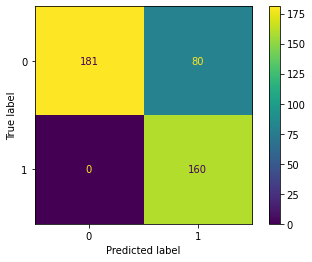

In [53]:
y = df['plate_present']
y_pred = df['yolo_detect']
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

recall = cm[1][1]/(cm[1][0]+cm[1][1])
precision = cm[1][1]/(cm[0][1]+cm[1][1])
detection_rate = df['plate_present']/df['yolo_detect']

print("precision: {precision}\nrecall: {recall}".format(precision=precision, recall=recall))
print("検知率：", precision*100)

In [72]:
# plotting plate's bounding box's coordinates
pred_positive = df.loc[df['yolo_detect'] == 1]

def do_click(trace, points, state):
    if points.point_inds:
        ind = points.point_inds[0]
        url = pred_positive["img_url"].iloc[ind]
        webbrowser.open_new_tab(url)
        
aoi_x = (df.loc[0, ['aoi_x_min', 'aoi_x_max']]*1280).to_list()
aoi_y = (df.loc[0, ['aoi_y_min', 'aoi_y_max']]*720).to_list()

x=[aoi_x[0], aoi_x[0], aoi_x[1], aoi_x[1], aoi[0]]
y=[aoi_y[0], aoi_y[1], aoi_y[1], aoi_y[0], aoi_y[0]]

fig = go.FigureWidget(layout={'hovermode': 'closest', "title_text":"BoundingBox's Width vs Height"})
_ = fig.add_scatter(x=pred_positive['yolo_x_max'], y=pred_positive['yolo_y_max'], mode='markers', marker={"color":pred_positive['plate_present']})
#_ = fig.add_shape(type='rect', x0=df['aoi_x_min'][0], y0=df['aoi_y_min'][0], x1=df['aoi_x_max'][0], y1=df['aoi_y_max'][0], line=dict(color="RoyalBlue"))
_ = fig.add_scatter(x=x, y=y, mode='lines')
#_ = fig.add_scatter3d(x=pred_positive['yolo_x_min'],y=pred_positive['yolo_y_min'], z=pred_positive['box_area'], mode='markers', marker={"color":pred_positive['plate_present']})
scatter = fig.data[0]
scatter.on_click(do_click)

fig

FigureWidget({
    'data': [{'marker': {'color': array([0., 0., 1., ..., 0., 0., 0.])},
              'mode': …